# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **sticking to the submission structure** (see below). This is especially true for the submission of your predictions and your textual answer.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [24]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split #, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn import preprocessing
from numpy import unravel_index
from matplotlib.colors import ListedColormap
from numpy import linspace
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [3]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:

In [79]:
#####################
###   load data   ###
#####################

# list of attributes for dropping
drop_list = ['imgId', 'is_aeroplane', 'is_bicycle', 'is_bird',
       'is_boat', 'is_bottle', 'is_bus', 'is_car', 'is_cat', 'is_chair',
       'is_cow', 'is_diningtable', 'is_dog', 'is_horse', 'is_motorbike',
       'is_pottedplant', 'is_sheep', 'is_sofa', 'is_tvmonitor']

# load datasets
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
images_train = pd.read_csv(data_path, delimiter = ',')
images_train = images_train.drop(drop_list, axis=1)

data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
images_val = pd.read_csv(data_path, delimiter = ',')
images_val = images_val.drop(drop_list, axis=1)

data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
images_test = pd.read_csv(data_path, delimiter = ',')

X_train = images_train.drop('is_person', axis=1).values
y_train = images_train['is_person'].values
X_val = images_val.drop('is_person', axis=1).values
y_val = images_val['is_person'].values
X_test = images_test.drop('is_person', axis=1).values
y_test = images_test['is_person'].values

print("Train: number of instances: {}, number of attributes: {}".format(images_train.shape[0], images_train.shape[1]))
print("Val: number of instances: {}, number of attributes: {}".format(images_val.shape[0], images_val.shape[1]))
print("Test: number of instances: {}, number of attributes: {}".format(images_test.shape[0], images_test.shape[1]))

Train: number of instances: 2113, number of attributes: 501
Val: number of instances: 1113, number of attributes: 501
Test: number of instances: 1114, number of attributes: 501


In [80]:
##########################
###   exploring data   ###
##########################

print(images_train.head(7))

images_train.describe()

       dim1      dim2      dim3      dim4      dim5      dim6      dim7  \
0  0.002232  0.000558  0.002790  0.000837  0.001674  0.001953  0.001395   
1  0.001563  0.000391  0.007422  0.003516  0.003906  0.005078  0.001953   
2  0.000521  0.000000  0.000000  0.001042  0.001563  0.005729  0.000521   
3  0.002976  0.002232  0.004464  0.000372  0.000372  0.002232  0.000000   
4  0.001359  0.000340  0.001359  0.000340  0.001359  0.002038  0.002378   
5  0.000000  0.006324  0.000372  0.000372  0.000372  0.000372  0.000744   
6  0.000340  0.000000  0.004416  0.000340  0.000679  0.006114  0.001359   

       dim8      dim9     dim10    ...        dim492    dim493    dim494  \
0  0.002232  0.003627  0.006138    ...      0.000558  0.005301  0.001116   
1  0.002344  0.001953  0.001953    ...      0.000000  0.008203  0.001172   
2  0.002083  0.003646  0.005208    ...      0.000000  0.000521  0.000521   
3  0.003720  0.000000  0.002232    ...      0.000000  0.015253  0.000744   
4  0.000000  0.0033

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801,0.448178
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857,0.497425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076,1.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755,1.000000



----------------------------------   frquencies of max values per instance   ------------------------------------------


/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


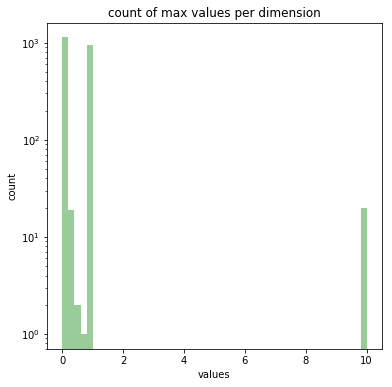

attributes with max values bigger than 7
144     9.991437
258     9.979275
401     9.984808
428     9.995523
438     9.992637
439     9.989439
507     9.959373
552     9.940516
799     9.992279
867     9.965948
946     9.984000
1515    9.986392
1643    9.932811
1808    9.993831
1822    9.997415
1879    9.996796
1965    9.999728
2064    9.997681
2090    9.988735
2095    9.993618
dtype: float64


In [90]:
print('\n----------------------------------   frquencies of max values per instance   ------------------------------------------')
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(images_train.max(axis=1).values[:-1], ax=ax, kde=False, color='green')
ax.set(xlabel='values', ylabel='count')
ax.set(yscale="log")
ax.set(title="count of max values per dimension")
plt.show()
images_train.max()

# find attributes that are larger than 0.1
x = images_train.iloc[:,:-1].max(axis=1) > 7
print("attributes with max values bigger than 7")
print(images_train.iloc[:,:-1].max(axis=1)[x])

In [91]:
#############################
###   removing outliers   ###
#############################

images_train_org = images_train.copy()

# filter all instances with values over 7
images_train = images_train[images_train < 7]
images_train.dropna(inplace=True)

X_train = images_train.drop('is_person', axis=1).values
y_train = images_train['is_person'].values

print(images_train.shape)

(2093, 501)


In [61]:
############################
###   standardize data   ###
############################

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#########################
#########################
###                   ###
###   Classification  ###
###                   ###
##########################
##########################

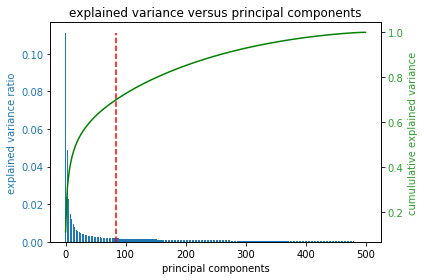

In [32]:
##############################################
###   PCA - Principal component analysis   ###
##############################################

# fit PCA
pca = PCA(n_components=X_train.shape[1], svd_solver='full')
pca.fit(X_train) # X

# make cumulative array of the variance
culm_var = np.cumsum(pca.explained_variance_ratio_)
    
# find 70%
idx_07 = (np.abs(culm_var-0.70)).argmin()

# make plot
fig, ax1 = plt.subplots()
plt.title('explained variance versus principal components')

# plot explained variance ratio
color = 'tab:blue'
ax1.set_xlabel('principal components')
ax1.set_ylabel('explained variance ratio', color=color)
ax1.bar(np.arange(X_train.shape[1]), pca.explained_variance_ratio_)
ax1.tick_params(axis='y', labelcolor=color)

# plot 80% of the variance is explained
ax1.vlines(idx_07, 0, pca.explained_variance_ratio_.max(), colors='k', linestyles='--', label='80%', color='r')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# plot cumative variance
color = 'tab:green'
ax2.set_ylabel('cumululative explained variance', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(X_train.shape[1]), culm_var, color='g')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [33]:
### fit PCA

pca = PCA(n_components=idx_07, svd_solver='full')
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [44]:
############################
###   NB - Naive Bayes   ###
############################

Xs = [[X_train,X_val,'without PCA'],[X_train_pca,X_val_pca,'with PCA']]
for X in Xs:
    print("\n*****************   " + X[2] + "   *****************\n")
    gnb = GaussianNB()
    gnb.fit(X[0], y_train)
    pred = gnb.predict_proba(X[1])

    print("score:    {:.3f}".format(gnb.score(X[1],y_val)))
    print("log loss: {:.3f}".format(log_loss(y_val,pred))) 


*****************   without PCA   *****************

score:    0.644
log loss: 8.386

*****************   with PCA   *****************

score:    0.631
log loss: 1.082


In [41]:
####################################
###   LR - Logistic Regression   ###
####################################

# trying LR with solver: 'lbfgs', 'liblinear', 'newton-cg'
solvers = ['lbfgs', 'liblinear', 'newton-cg']

Xs = [[X_train,X_val,'without PCA'],[X_train_pca,X_val_pca,'with PCA']]
for X in Xs:
    print("\n*****************   " + X[2] + "   *****************\n")
    for solver in solvers:
        print("-----------------   solver: " + solver + "   -----------------")
        lr = LogisticRegression(solver=solver)
        lr.fit(X[0], y_train)
        pred = lr.predict_proba(X[1])

        print("score:    {:.3f}".format(lr.score(X[1],y_val)))
        print("log loss: {:.3f}".format(log_loss(y_val,pred)))


*****************   without PCA   *****************

-----------------   solver: lbfgs   -----------------
score:    0.643
log loss: 0.835
-----------------   solver: liblinear   -----------------
score:    0.645
log loss: 0.835
-----------------   solver: newton-cg   -----------------
score:    0.643
log loss: 0.835

*****************   with PCA   *****************

-----------------   solver: lbfgs   -----------------
score:    0.696
log loss: 0.590
-----------------   solver: liblinear   -----------------
score:    0.697
log loss: 0.590
-----------------   solver: newton-cg   -----------------
score:    0.697
log loss: 0.590


In [42]:
###########################################
###   SVC - Support Vector Classifier   ###
###########################################

# trying SVC with kernel: 'poly', 'rbf', 'sigmoid', 'linear'
kernels = ['poly', 'rbf', 'sigmoid', 'linear']

Xs = [[X_train,X_val,'without PCA'],[X_train_pca,X_val_pca,'with PCA']]
for X in Xs:
    print("\n*****************   " + X[2] + "   *****************\n")
    for kernel in kernels:
        print("-----------------   kernel: " + kernel + "   -----------------")
        svc = SVC(kernel=kernel, probability=True)
        svc.fit(X[0], y_train)
        pred = svc.predict_proba(X[1])

        print("score:    {:.3f}".format(svc.score(X[1],y_val))) 
        print("log loss: {:.3f}".format(log_loss(y_val,pred)))


*****************   without PCA   *****************

-----------------   kernel: poly   -----------------
score:    0.702
log loss: 0.600
-----------------   kernel: rbf   -----------------
score:    0.730
log loss: 0.542
-----------------   kernel: sigmoid   -----------------
score:    0.649
log loss: 0.651
-----------------   kernel: linear   -----------------
score:    0.639
log loss: 0.629

*****************   with PCA   *****************

-----------------   kernel: poly   -----------------
score:    0.686
log loss: 0.603
-----------------   kernel: rbf   -----------------
score:    0.700
log loss: 0.563
-----------------   kernel: sigmoid   -----------------
score:    0.555
log loss: 0.684
-----------------   kernel: linear   -----------------
score:    0.703
log loss: 0.585


In [49]:
#####################################
###   KNN - K-nearest neighbors   ###
#####################################

Xs = [[X_train,X_val,'without PCA'],[X_train_pca,X_val_pca,'with PCA']]
for X in Xs:
    print("\n*****************   " + X[2] + "   *****************\n")
    
    #trying KNN with K: 5 to 20
    for k in np.arange(5,20,2):
        print("-----------------   k: " + str(k) + "   -----------------")
        knc = KNeighborsClassifier(n_neighbors=k)
        knc.fit(X[0], y_train)
        pred = knc.predict_proba(X[1])

        print("score:    {:.3f}".format(knc.score(X[1],y_val))) 
        print("log loss: {:.3f}".format(log_loss(y_val,pred)))


*****************   without PCA   *****************

-----------------   k: 5   -----------------
score:    0.651
log loss: 1.546
-----------------   k: 7   -----------------
score:    0.662
log loss: 0.976
-----------------   k: 9   -----------------
score:    0.662
log loss: 0.692
-----------------   k: 11   -----------------
score:    0.655
log loss: 0.631
-----------------   k: 13   -----------------
score:    0.668
log loss: 0.626
-----------------   k: 15   -----------------
score:    0.662
log loss: 0.625
-----------------   k: 17   -----------------
score:    0.664
log loss: 0.626
-----------------   k: 19   -----------------
score:    0.668
log loss: 0.624

*****************   with PCA   *****************

-----------------   k: 5   -----------------
score:    0.657
log loss: 1.835
-----------------   k: 7   -----------------
score:    0.647
log loss: 0.988
-----------------   k: 9   -----------------
score:    0.652
log loss: 0.781
-----------------   k: 11   ---------------

In [64]:
X_train.shape

(2093, 500)

In [65]:
y_train.shape

(2093,)

In [68]:
##########################################
###   NN - Neural Network Classifier   ###
##########################################

# model
params = {'hidden_layer_sizes': [(4,), (8,), (16,), (32,), (64,), (128,), (4, 8, 4,), (16, 32, 16,)]}
mlp = MLPClassifier(verbose=False, learning_rate='adaptive', random_state=100)
clf = GridSearchCV(mlp, params, verbose=False, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
print('Best params appeared to be', clf.best_params_)

pred = clf.predict_proba(X_val)
print('score:    ', clf.score(X_val,y_val)) 
print('log loss: ', log_loss(y_val,pred))

Training model.


/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stoch

Finished with grid search with best mean cross-validated score: 0.692785475394171
Best params appeared to be {'hidden_layer_sizes': (32,)}
Score  0.6972147349505841
log loss  1.2858204123741184


In [67]:
#alphas = np.logspace(-3,3,25)
alphas = np.arange(10,21)
for alpha in alphas:
    mlp = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, learning_rate='adaptive', learning_rate_init=0.001, alpha=alpha, random_state=100)
    mlp.fit(X_train,y_train)
    pred = mlp.predict_proba(X_val)
    
    print('------------------------   alpha: ' + str(alpha) + '   ------------------------')
    print(mlp.score(X_val,y_val)) 
    print(log_loss(y_val,pred))

------------------------   alpha: 10   ------------------------
0.6954177897574124
0.5708516924731579
------------------------   alpha: 11   ------------------------
0.7044025157232704
0.5667917421377227
------------------------   alpha: 12   ------------------------
0.7035040431266847
0.564187124707343
------------------------   alpha: 13   ------------------------
0.7053009883198562
0.5630058160804434
------------------------   alpha: 14   ------------------------
0.7053009883198562
0.5619450304021824
------------------------   alpha: 15   ------------------------
0.7026055705300989
0.5616814131422224
------------------------   alpha: 16   ------------------------
0.7035040431266847
0.5613131726863564
------------------------   alpha: 17   ------------------------
0.7044025157232704
0.5614416445954253
------------------------   alpha: 18   ------------------------
0.7142857142857143
0.5581086184853132
------------------------   alpha: 19   ------------------------
0.710691823899371
0

In [70]:
###########################################
###   SVC - Support Vector Classifier   ###
###      tuning - find optimal C        ###
###########################################

# try C from 0.01 until 1000
c_array = np.logspace(-2, 3, num=6)

for c in c_array:
    print("-----------------   C: " + str(c) + "   -----------------")
    svc = SVC(kernel='rbf', probability=True, C=c)
    svc.fit(X_train, y_train)
    prob = svc.predict_proba(X_val)
    print("score:    {:.3f}".format(svc.score(X_val,y_val)))
    print("log loss: {:.3f}".format(log_loss(y_val,prob)))

-----------------   C: 0.01   -----------------
score:    0.527
log loss: 0.599
-----------------   C: 0.1   -----------------
score:    0.686
log loss: 0.575
-----------------   C: 1.0   -----------------
score:    0.730
log loss: 0.542
-----------------   C: 10.0   -----------------
score:    0.712
log loss: 0.552
-----------------   C: 100.0   -----------------
score:    0.712
log loss: 0.552
-----------------   C: 1000.0   -----------------
score:    0.712
log loss: 0.552


In [71]:
###########################################
###   SVC - Support Vector Classifier   ###
###      tuning - find optimal C        ###
###########################################

# try C from 0.6 until 1.4
c_array = np.arange(0.6, 1.5, 0.1)

for c in c_array:
    print("-----------------   C: " + str(c) + "   -----------------")
    svc = SVC(kernel='rbf', probability=True, C=c)
    svc.fit(X_train, y_train)
    prob = svc.predict_proba(X_val)
    print("score:    {:.3f}".format(svc.score(X_val,y_val)))
    print("log loss: {:.3f}".format(log_loss(y_val,prob)))

-----------------   C: 0.6   -----------------
score:    0.716
log loss: 0.545
-----------------   C: 0.7   -----------------
score:    0.717
log loss: 0.544
-----------------   C: 0.7999999999999999   -----------------
score:    0.721
log loss: 0.543
-----------------   C: 0.8999999999999999   -----------------
score:    0.723
log loss: 0.542
-----------------   C: 0.9999999999999999   -----------------
score:    0.730
log loss: 0.542
-----------------   C: 1.0999999999999999   -----------------
score:    0.730
log loss: 0.542
-----------------   C: 1.1999999999999997   -----------------
score:    0.730
log loss: 0.542
-----------------   C: 1.2999999999999998   -----------------
score:    0.732
log loss: 0.542
-----------------   C: 1.4   -----------------
score:    0.731
log loss: 0.543


In [73]:
###########################################
###   SVC - Support Vector Classifier   ###
###  final model: kernel='rbf' | C=1.3  ###
###########################################

print("-----------------   C: " + str(c) + "   -----------------")
svc = SVC(kernel='rbf', probability=True, C=c)
svc.fit(X_train, y_train)
prob = svc.predict_proba(X_val)
print("score:    {:.3f}".format(svc.score(X_val,y_val)))
print("log loss: {:.3f}".format(log_loss(y_val,prob)))

pred_probabilities = svc.predict_proba(X_test)

-----------------   C: 1.4   -----------------
score:    0.731
log loss: 0.542


#ANSWER_TEXT#

***Your answer goes here:***

preprocessing used:
* removing outliers
* standardize

Classifiers used:
* NaiveBayes
* LinearRegression
* SVM
* KNN
* NeuralNetwork

#### first approach
- exploration of the dataset
found that there are outliers
- preprocessing
cleand the outliers
- trained the classifiers with default settings
My idea was to compare the classifiers against each other and to select the best performing ones to tune
after training most of the classifiers performed pretty bad. After some research i found that the i had forgotten to standardize the data.

#### second approach
- preprocessing
i used the already cleand dataset and standardized it.
- trained the classifiers with default settings
As before i trained the classifiers with diffrent prameters to compare the classifiers against each other
the results were much better.


the most promesing classifiers were
* SVM
much better than naive bayes and logistic regression with the rbf 'radial basis function' kernel best result
* KNN
seem KNN with comparable results
* NeuralNetwork
tried with differen hidden layer architectures 
(16,), (32,), (64,), (128,), (256,), (512,), (64, 128, 64,), (128, 256, 128,)
best results with a 'shallow' netwoork with just 1 layer and 4 hidden neurons. deeper or wider networks have a good score but overfits massivley. It is possible to get better results by tuneing the the regularization parameter alpha (L2), but the

#### third approach
- using PCA to make the attributes more independent and to reduce dimensionality

PCA used 70% of the variance
Es expected it helped to get a higher performance on NB and Logistic classifier and no gain in perforance in SVM KNN and NN.

#### final tuneing

At the end i sereched for the best regularization parameter C for SVM

#### conclusion
althoug i tryed several classifiers. SVM with a radial basis function and a regaluazation Parameter of X outperformed all other classifiers like NN and logistic regression. I think with the possibilities of using other liberies  that support convolutional NN architectures and the raw data (the real pictures), it could be possible to gain even better results than with SVM.


The final Model is a:
classifier SVM
kernel rbf
regaluazation Parameter C 1.4

score:    0.731
log loss: 0.542


In [92]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.74839843, 0.25160157
0.86473053, 0.13526947
0.40629234, 0.59370766
0.39492223, 0.60507777
0.81439497, 0.18560503
0.10248742, 0.89751258
0.22912418, 0.77087582
0.08949360, 0.91050640
0.89312771, 0.10687229
0.72351856, 0.27648144
0.50000000, 0.50000000
0.83395347, 0.16604653
0.57637033, 0.42362967
0.64328947, 0.35671053
0.02683674, 0.97316326
0.57427048, 0.42572952
0.05515525, 0.94484475
0.53035772, 0.46964228
0.85397978, 0.14602022
0.48347332, 0.51652668
0.86505016, 0.13494984
0.40289681, 0.59710319
0.73651682, 0.26348318
0.42412340, 0.57587660
0.70969256, 0.29030744
0.07974280, 0.92025720
0.24098805, 0.75901195
0.81700401, 0.18299599
0.35834091, 0.64165909
0.49117055, 0.50882945
0.77316375, 0.22683625
0.38091001, 0.61908999
0.88988085, 0.11011915
0.32000804, 0.67999196
0.75919962, 0.24080038
0.50903145, 0.49096855
0.24898272, 0.75101728
0.73139051, 0.26860949
0.81458212, 0.18541788
0.45878539, 0.54121461
0.76025052, 0.23974948
0.67714889, 0.32285111
0.39613290, 0.60386710
0.91069784,